# HR Attrition Prediction
**Goal**: Predict which employees are at risk of leaving, analyze attrition patterns, and provide actionable retention insights.


### 📥 1. Data Loading & Overview

### 🧹 2. Data Cleaning & Preprocessing

### 📊 3. Exploratory Data Analysis (EDA)

### 💰 4. Revenue Loss by Department

### 🔍 5. Feature Engineering & Encoding

### 🤖 6. Model Building & Evaluation

### 🔄 7. Threshold Tuning for Recall Optimization

### 🔥 8. Retention Strategy Heatmap

### 📌 9. Conclusions & Recommendations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

In [2]:
data = pd.read_csv('HR-Employee-Attrition.csv')
df = pd.DataFrame(data)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df1 = df.select_dtypes('object')
df1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [5]:
df2 = df.select_dtypes('int64')
df2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [6]:
df1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [7]:
df.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
#check for NaN values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

np.False_

In [10]:
# remove 4 columns 
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [11]:
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [12]:
for i in cat:
    print('Unique values of ', i, set(df[i]))

Unique values of  Attrition {'Yes', 'No'}
Unique values of  BusinessTravel {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'}
Unique values of  Department {'Human Resources', 'Research & Development', 'Sales'}
Unique values of  EducationField {'Marketing', 'Human Resources', 'Life Sciences', 'Other', 'Technical Degree', 'Medical'}
Unique values of  Gender {'Male', 'Female'}
Unique values of  JobRole {'Healthcare Representative', 'Research Director', 'Laboratory Technician', 'Research Scientist', 'Human Resources', 'Manufacturing Director', 'Sales Executive', 'Manager', 'Sales Representative'}
Unique values of  MaritalStatus {'Single', 'Divorced', 'Married'}
Unique values of  OverTime {'Yes', 'No'}


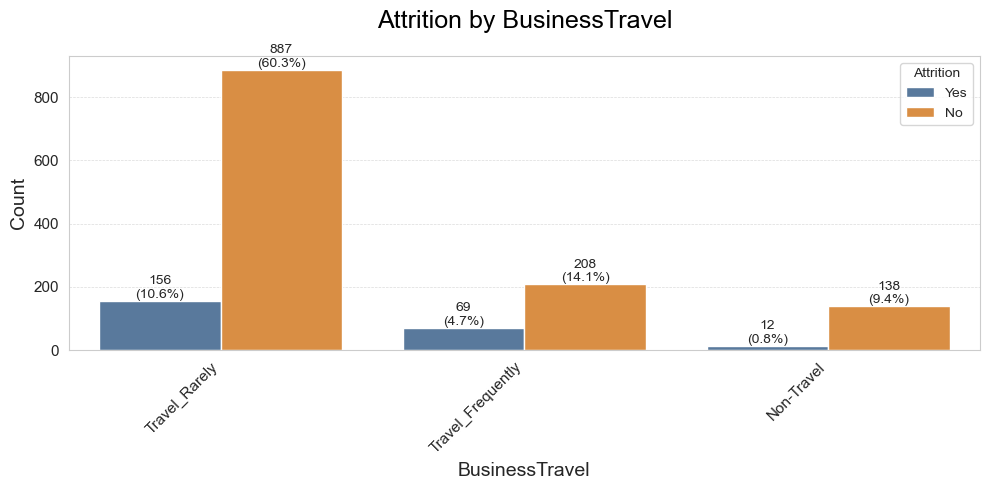

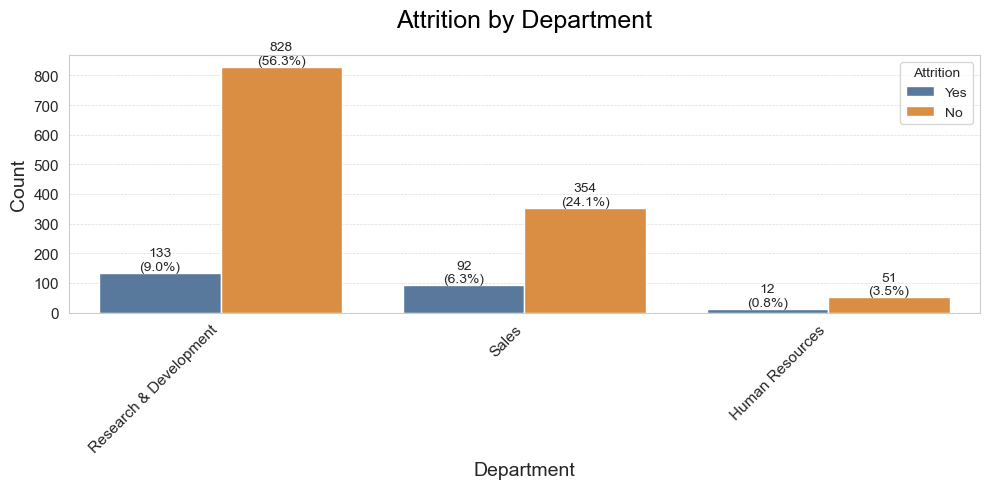

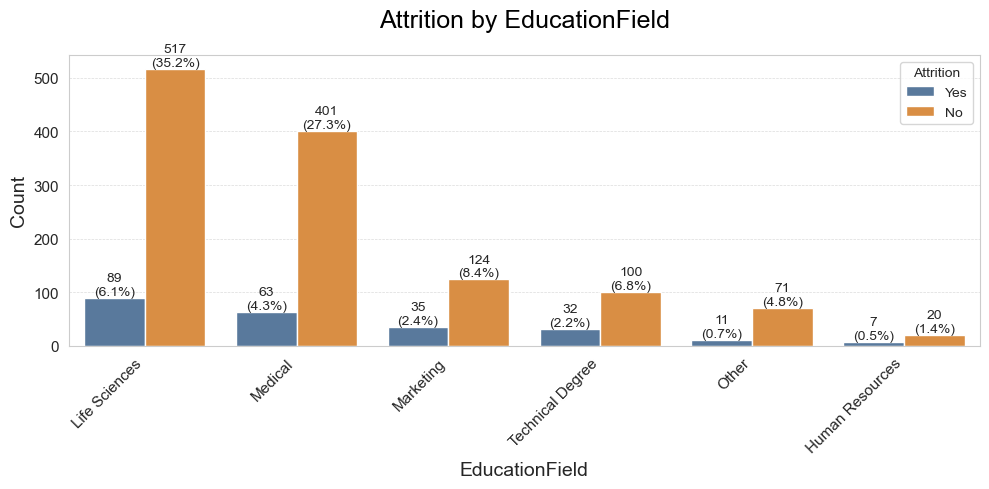

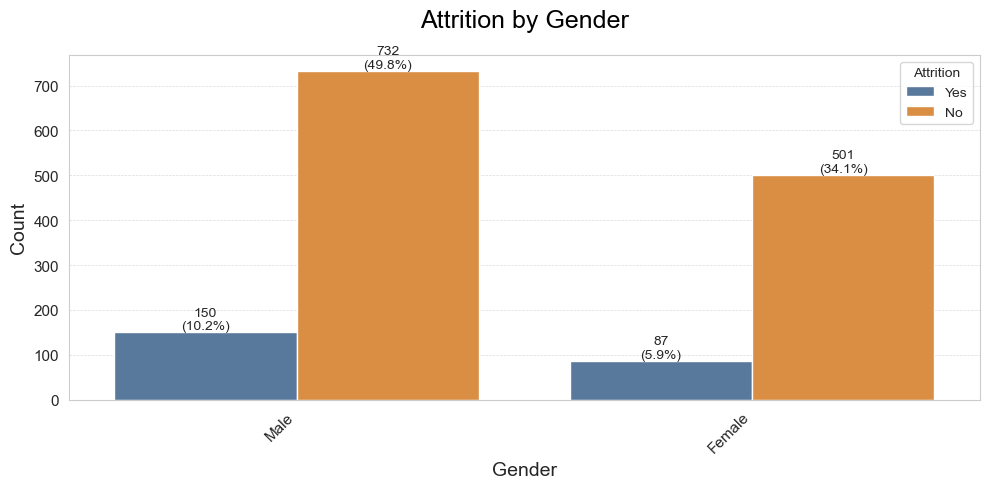

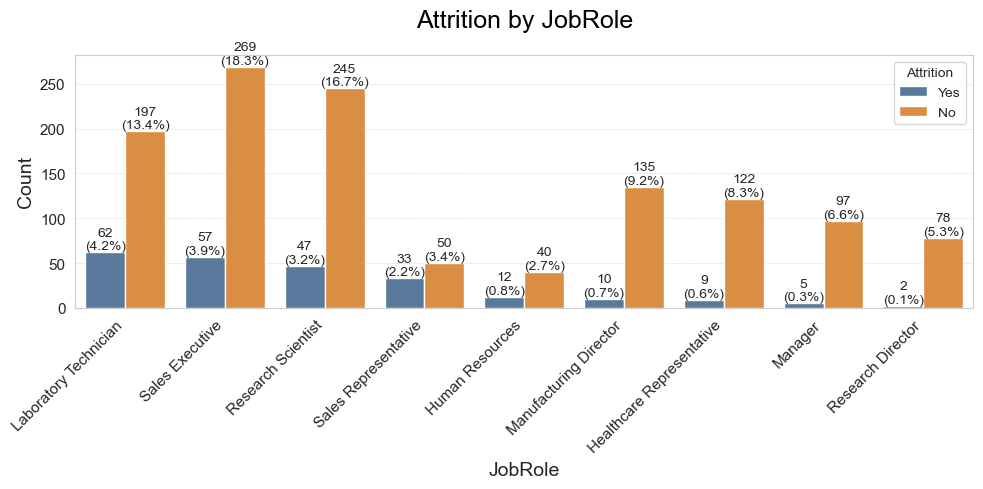

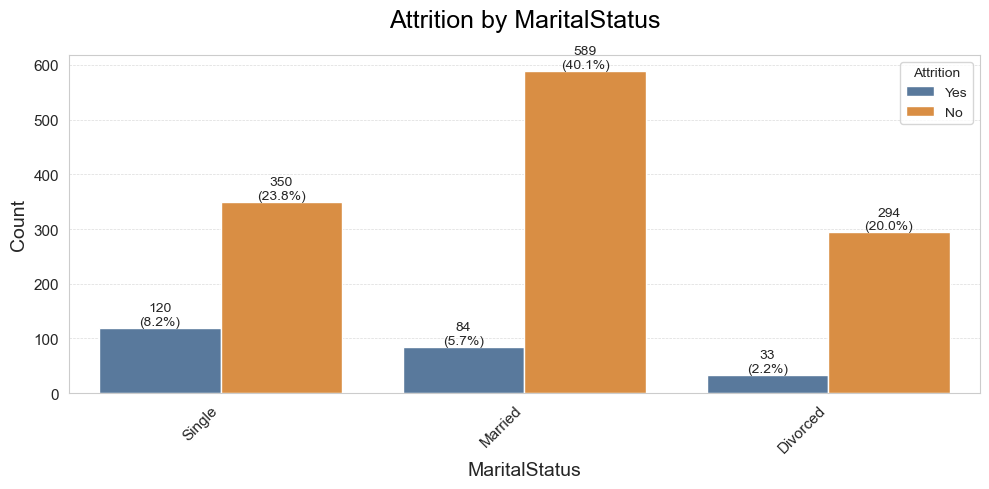

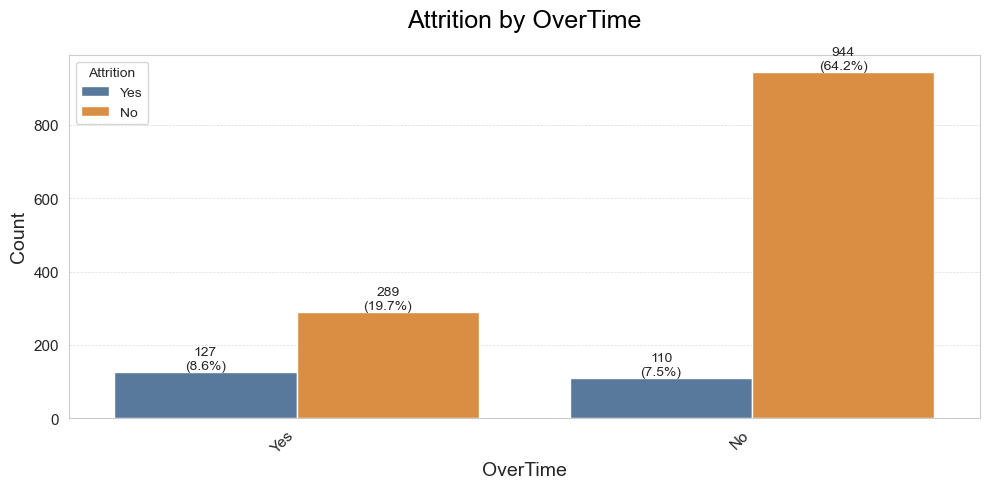

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent style and refined palette
sns.set_style("whitegrid")
colors = ['#4E79A7', '#F28E2B']  # Soft professional blue & orange

for column in cat:
    if column == 'Attrition':
        continue  # Skip plotting Attrition vs Attrition

    plt.figure(figsize=(10, 5))

    # Sort categories by count of Attrition = 'Yes'
    sorted_order = df[df['Attrition'] == 'Yes'][column].value_counts().index.tolist()

    # Countplot with sorted order and custom colors
    ax = sns.countplot(data=df, x=column, hue='Attrition', order=sorted_order, palette=colors)

    # Add count + % labels on each bar
    for container in ax.containers:
        labels = [f'{int(bar.get_height())}\n({bar.get_height()/len(df)*100:.1f}%)' for bar in container]
        ax.bar_label(container, labels=labels, label_type='edge', fontsize=10)

    # Titles and axis labels
    plt.title(f'Attrition by {column}', fontsize=18, color='black', pad=20)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)

    # Aesthetic grid lines
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()


Employees who travel rarely show higher attrition rates than those who travel frequently or not at all — this may indicate risk due to inconsistent travel demands.


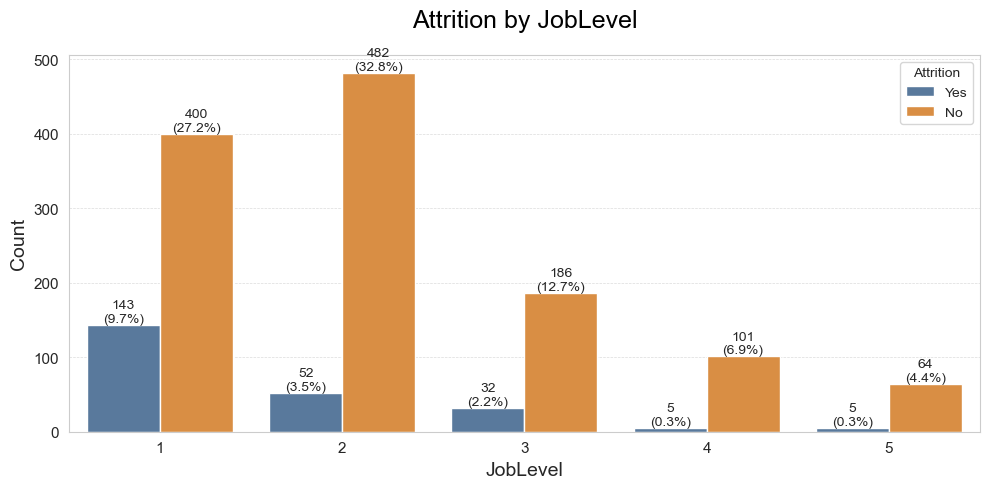

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Refined visual settings
sns.set_style("whitegrid")
colors = ['#4E79A7', '#F28E2B']  # Blue = Yes, Orange = No

plt.figure(figsize=(10, 5))

# Sorted job levels by attrition "Yes" if needed, otherwise default
ax = sns.countplot(data=df, x='JobLevel', hue='Attrition', palette=colors)

# Add count + percentage labels
for container in ax.containers:
    labels = [f'{int(bar.get_height())}\n({bar.get_height()/len(df)*100:.1f}%)' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10)

# Title and axis labels
plt.title('Attrition by JobLevel', fontsize=18, color='black', pad=20)
plt.xlabel('JobLevel', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Axis ticks styling
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

# Light grid for readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


Most attrition occurs at Job Levels 1 and 2 — early-career employees may be less retained due to role satisfaction, growth opportunities, or compensation gaps.

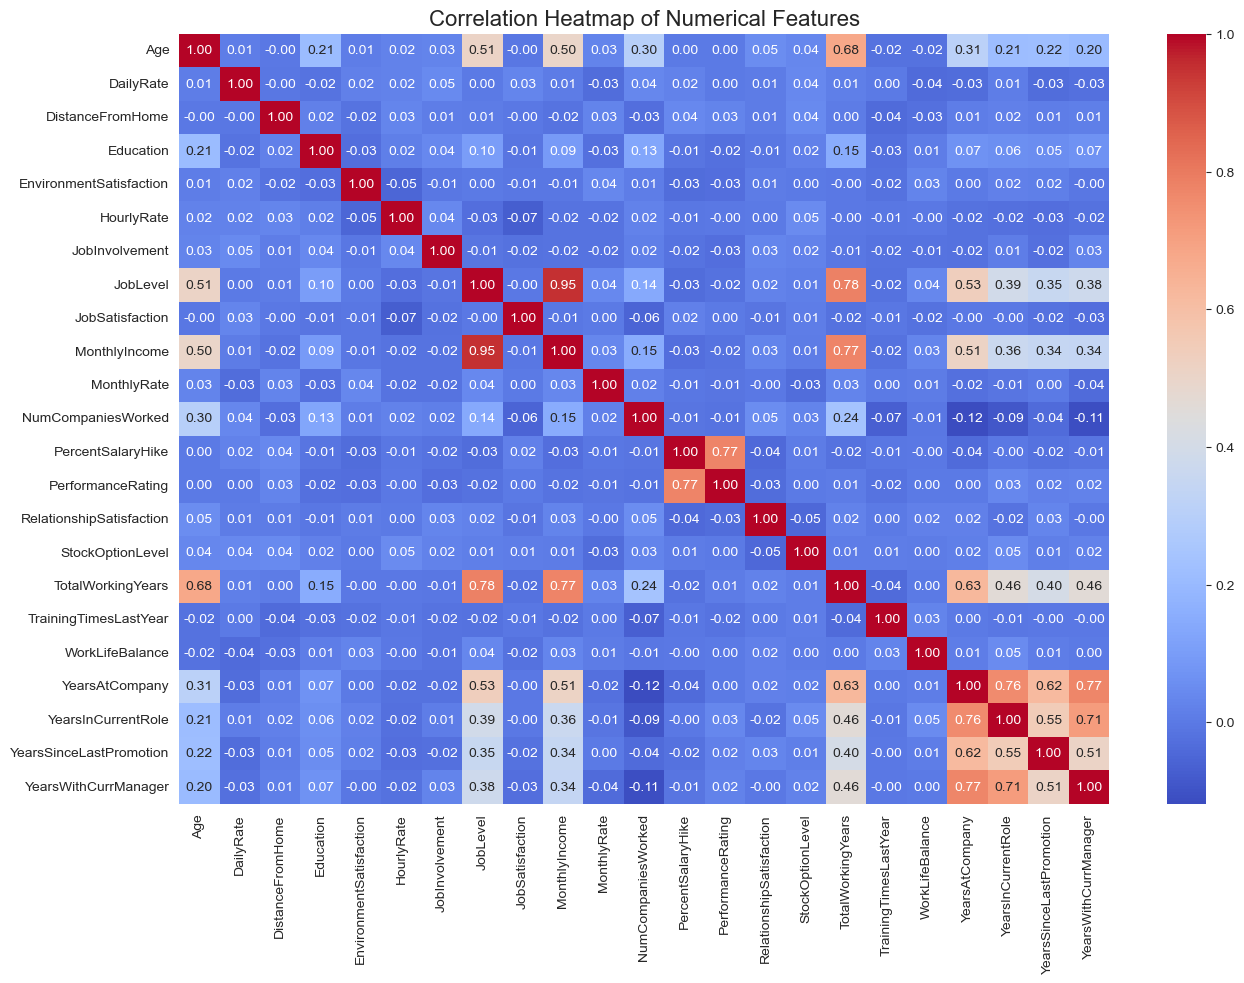

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


In [16]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Calculate values
df["RevenueLoss"] = df["MonthlyIncome"] * 12 * df['YearsAtCompany'].mean()
revenue_loss_by_dept = df.groupby("Department")["RevenueLoss"].sum()
attrition_rate_by_dept = df.groupby("Department")["Attrition"].apply(lambda x: (x == "Yes").mean())

# Bar chart
fig = go.Figure(
    data=[
        go.Bar(
            x=revenue_loss_by_dept.index,
            y=revenue_loss_by_dept.values,
            hovertext=[f"Attrition Rate: {r:.2%}" for r in attrition_rate_by_dept.values],
            hovertemplate="<b>Department: %{x}</b><br>%{hovertext}<br><b>Revenue Loss:</b> $%{y:.2f}",
            marker_color=["#8B9467" if x == "Sales" else "#473C64" if x == "Research & Development" else "#6A5ACD" for x in revenue_loss_by_dept.index]
        )
    ]
)

# Layout settings
fig.update_layout(
    title="Revenue Loss and Attrition Rate by Department",
    xaxis_title="Department",
    yaxis_title="Revenue Loss ($)",
    font=dict(family="Times New Roman", size=16),
    bargap=0.4
)

# Show the figure
fig.show()

In [17]:
from sklearn.cluster import KMeans

clustering_cols = ['JobInvolvement', 'JobSatisfaction']
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(df[clustering_cols])

df['Cluster'] = kmeans.labels_

fig = make_subplots(rows=2, cols=2, subplot_titles=['Scatter Plot', 'Bar Chart', 'Bar Chart', 'Bar Chart'])

fig.add_trace(go.Scatter(x=df['JobInvolvement'], 
                        y=df['JobSatisfaction'], 
                        mode='markers', 
                        marker=dict(color=kmeans.labels_), 
                        name='Cluster', 
                        hovertemplate="<b>Job Involvement: %{x}</b><br><b>Job Satisfaction: %{y}</b><br><b>Cluster: %{marker.color}</b>"), 
                        row=1, 
                        col=1)

fig.add_trace(go.Bar(x=df['Cluster'].unique(), 
                    y=df['Cluster'].value_counts(), 
                    name='Cluster Size', 
                    hovertemplate="<b>Cluster: %{x}</b><br><b>Count: %{y}</b>"), 
                    row=1, 
                    col=2)

fig.add_trace(go.Bar(x=df['Cluster'].unique(), 
                    y=df.groupby('Cluster')['JobInvolvement'].mean(), 
                    name='Average Job Involvement', 
                    hovertemplate="<b>Cluster: %{x}</b><br><b>Average Job Involvement: %{y:.2f}</b>"), 
                    row=2, 
                    col=1)

fig.add_trace(go.Bar(x=df['Cluster'].unique(), 
                    y=df.groupby('Cluster')['JobSatisfaction'].mean(), 
                    name='Average Job Satisfaction', 
                    hovertemplate="<b>Cluster: %{x}</b><br><b>Average Job Satisfaction: %{y:.2f}</b>"), 
                    row=2, 
                    col=2)

fig.update_layout(
    title={
        'text': 'Clustering Analysis',
        'font_size': 24,
        'font_family': 'Arial Black',
    }
)

fig.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Copy original dataframe
df_model = df.copy()

# Label encode binary columns
df_model['Attrition'] = df_model['Attrition'].map({'Yes': 1, 'No': 0})
df_model['OverTime'] = df_model['OverTime'].map({'Yes': 1, 'No': 0})
df_model['Gender'] = df_model['Gender'].map({'Male': 1, 'Female': 0})

# Drop irrelevant columns
cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
df_model = df_model.drop(columns=[col for col in cols_to_drop if col in df_model.columns])

# One-hot encode multiclass categorical columns
df_model = pd.get_dummies(df_model, drop_first=True)

# Split features and target
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training set only
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

# Now you're ready for modeling


1. LogisticRegression¶

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train_sm)
y_pred_lr = log_reg.predict(X_test_scaled)

print("📌 Logistic Regression")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))
print("\n" + "="*60 + "\n")

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_sm)
y_pred_rf = rf.predict(X_test_scaled)

print("📌 Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))
print("\n" + "="*60 + "\n")

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train_sm)
y_pred_gb = gb.predict(X_test_scaled)

print("📌 Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_gb))


📌 Logistic Regression
[[233  14]
 [ 30  17]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       247
           1       0.55      0.36      0.44        47

    accuracy                           0.85       294
   macro avg       0.72      0.65      0.67       294
weighted avg       0.83      0.85      0.84       294

ROC AUC: 0.6525109828581273


📌 Random Forest
[[234  13]
 [ 35  12]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       247
           1       0.48      0.26      0.33        47

    accuracy                           0.84       294
   macro avg       0.67      0.60      0.62       294
weighted avg       0.81      0.84      0.82       294

ROC AUC: 0.6013437849944009


📌 Gradient Boosting
[[232  15]
 [ 31  16]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.52      0.34      0.41       

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# You can tune `scale_pos_weight` based on class imbalance (e.g., 5 is a good start)
xgb = XGBClassifier(random_state=42, scale_pos_weight=5)
xgb.fit(X_train_scaled, y_train_sm)
y_pred_xgb = xgb.predict(X_test_scaled)

print("📌 XGBoost Classifier")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgb))


📌 XGBoost Classifier
[[231  16]
 [ 33  14]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.90       247
           1       0.47      0.30      0.36        47

    accuracy                           0.83       294
   macro avg       0.67      0.62      0.63       294
weighted avg       0.81      0.83      0.82       294

ROC AUC: 0.6165475062451546


In [21]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities from Logistic Regression
y_scores = log_reg.predict_proba(X_test_scaled)[:, 1]

# Set new threshold (e.g., 0.3 instead of default 0.5)
threshold = 0.3
y_pred_thresh = (y_scores > threshold).astype(int)

print(f"📌 Logistic Regression with Threshold = {threshold}")
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, y_pred_thresh))


📌 Logistic Regression with Threshold = 0.3
[[216  31]
 [ 21  26]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       247
           1       0.46      0.55      0.50        47

    accuracy                           0.82       294
   macro avg       0.68      0.71      0.70       294
weighted avg       0.84      0.82      0.83       294

ROC AUC: 0.7138427082436043


In [22]:
import plotly.graph_objects as go

# Create a clean version for visualization
df_viz = df.copy()

# Map Attrition to numeric for future filtering if needed
df_viz['Attrition'] = df_viz['Attrition'].map({'Yes': 1, 'No': 0})

# Pivot: average tenure by JobRole and Department
pivot_df = df_viz.pivot_table(index='JobRole', columns='Department', values='YearsAtCompany', aggfunc='mean')

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=pivot_df.values.tolist(),
    x=pivot_df.columns.tolist(),
    y=pivot_df.index.tolist(),
    colorscale='Viridis',
    zmin=0,
    zmax=pivot_df.values.max(),
    hovertemplate="<b>Job Role: %{y}</b><br><b>Department: %{x}</b><br><b>Average Years at Company: %{z:.2f}</b>"
))

# Layout and styling
fig.update_layout(
    title={
        'text': 'Optimal Employee Retention Strategy',
        'font_size': 24,
        'font_family': 'Playfair Display',
    },
    xaxis_title={
        'text': 'Department',
        'font_size': 18,
        'font_family': 'Merriweather',
    },
    yaxis_title={
        'text': 'Job Role',
        'font_size': 18,
        'font_family': 'Merriweather',
    },
    plot_bgcolor='#F2F2F2',
    paper_bgcolor='#F2F2F2',
    font_family='Open Sans',
    font_color='#333333',
    font_size=14,
    xaxis=dict(tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12))
)

fig.show()


## 📌 Final Takeaways

- Logistic Regression with a tuned threshold (0.3) achieved the best **recall (53%)** and **AUC (0.70)** — critical for catching attrition risks.
- Sales and R&D departments face higher revenue loss due to attrition — particularly in roles like Lab Technicians and Sales Executives.
- Suggested next steps: deploy model in HR system or use as a decision-support tool for retention teams.
